In [1]:
%load_ext autoreload
%autoreload 2

# Augmentation

In [7]:
import pathlib

import cdmetadl.helpers.general_helpers
import cdmetadl.dataset

path_to_dataset = "/fastdata/vilab24/meta-album"

dataset_path = pathlib.Path(path_to_dataset)
dataset_info_dict = cdmetadl.helpers.general_helpers.check_datasets(dataset_path, ["SPT"])

dataset = cdmetadl.dataset.ImageDataset("Sports", dataset_info_dict["SPT"])

In [8]:
import cdmetadl.samplers

n_way_sampler = cdmetadl.samplers.ValueSampler(value=5)
k_shot_sampler = cdmetadl.samplers.ValueSampler(value=4)

task = dataset.generate_task(n_way_sampler, k_shot_sampler, query_size=4)

## Standard Augmentation

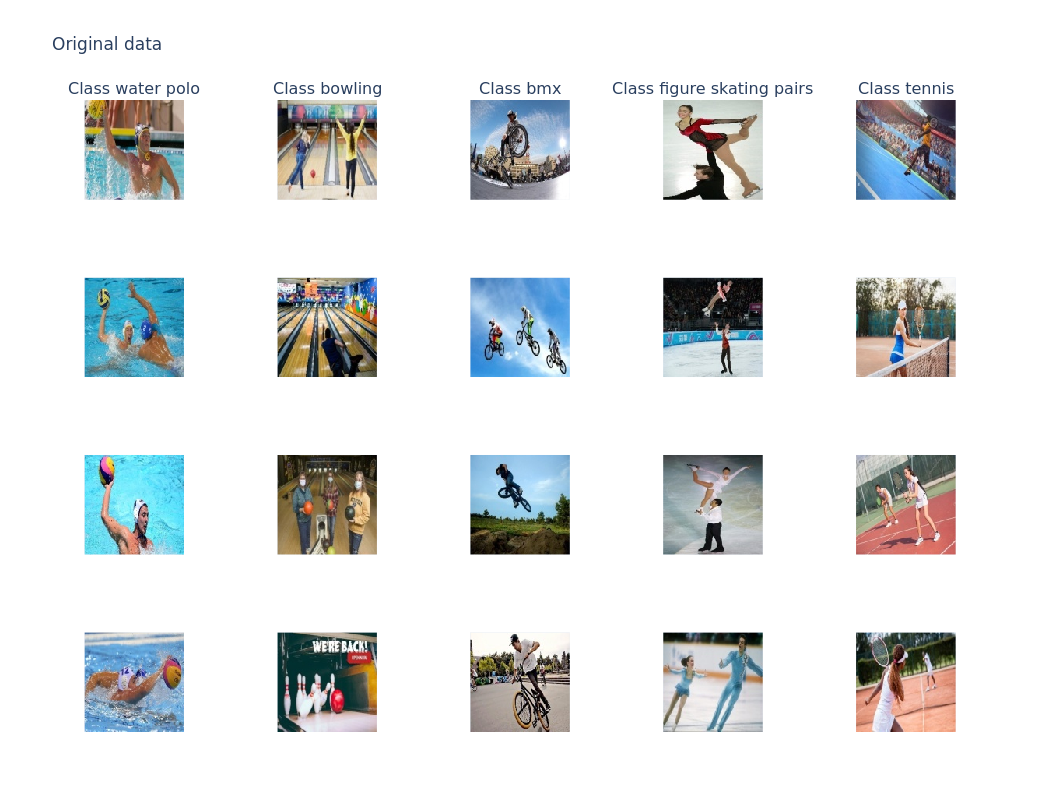

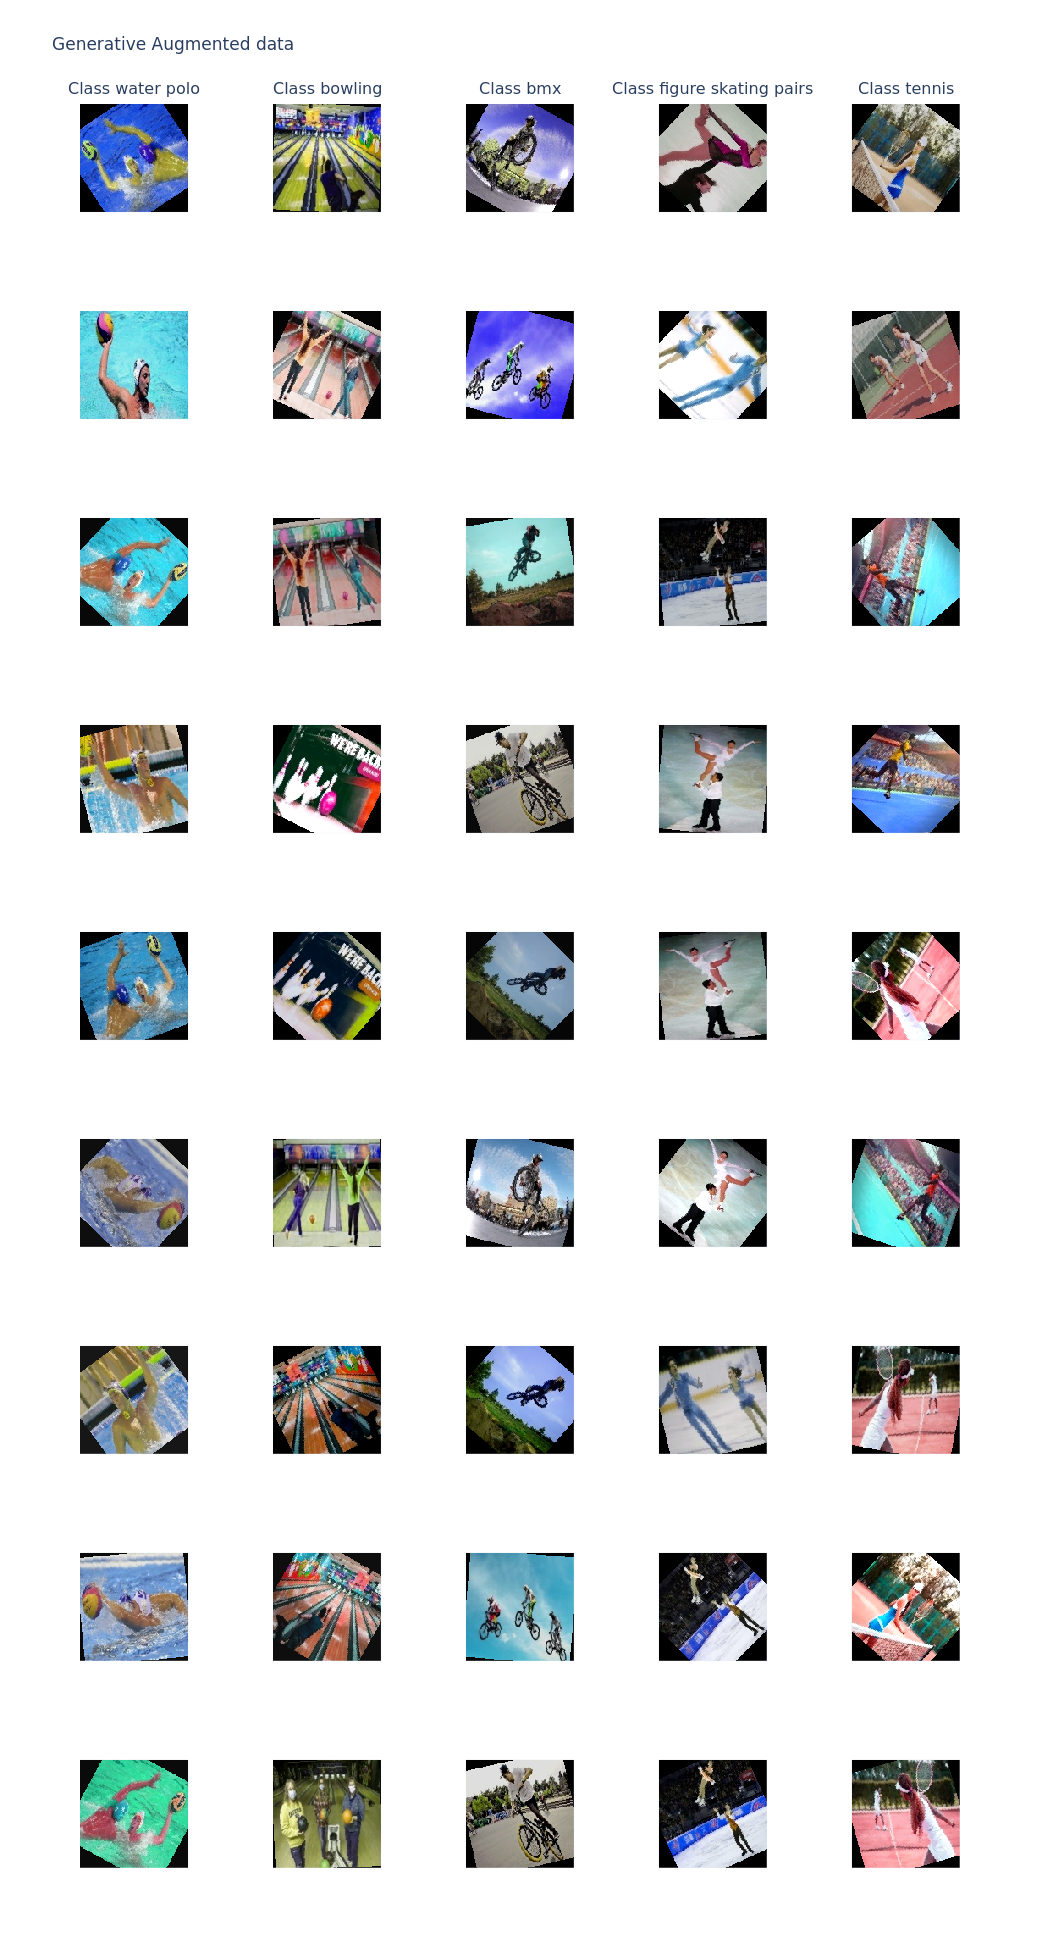

In [12]:
import cdmetadl.augmentation
from cdmetadl.notebooks.helpers import create_plot

standard_augmentor = cdmetadl.augmentation.StandardAugmentation(threshold=0.75, augmentation_size={"scale": 1, "maximum": 20, "offset": 5}, keep_original_data=False)
create_plot(standard_augmentor, task, conf_scores=[0.0, 0.0, 0.0, 0.0, 0.0])

## Pseudo Augmenation

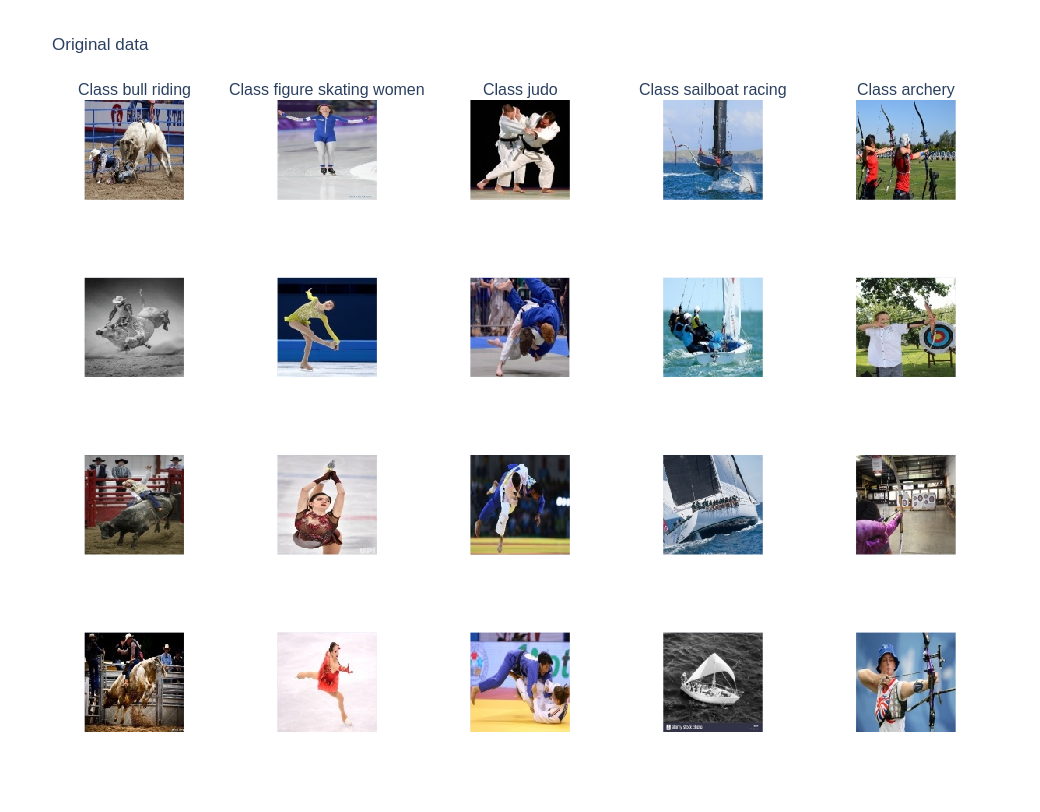

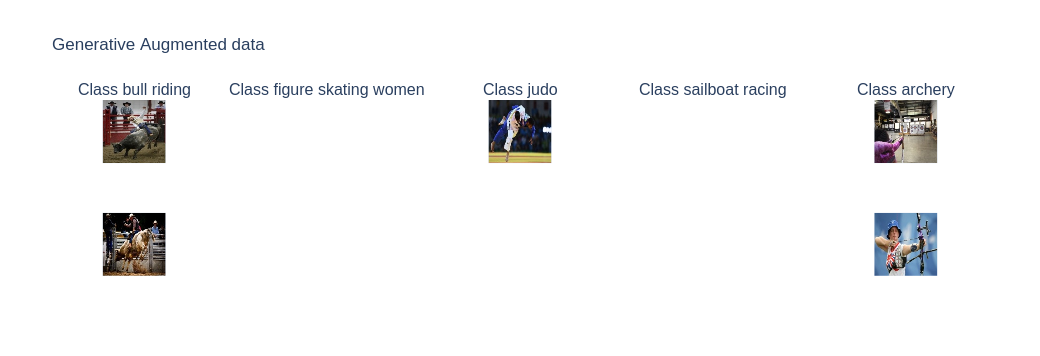

In [5]:
import cdmetadl.augmentation
import cdmetadl.notebooks.helpers

pseudo_augmentor = cdmetadl.augmentation.PseudoAugmentation(threshold=0.75, scale=1.0, keep_original_data=False)
create_plot(pseudo_augmentor, task, conf_scores=[0.0, 1.0, 0.5, 0.75, 0.3])

## Generative Augmentation

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

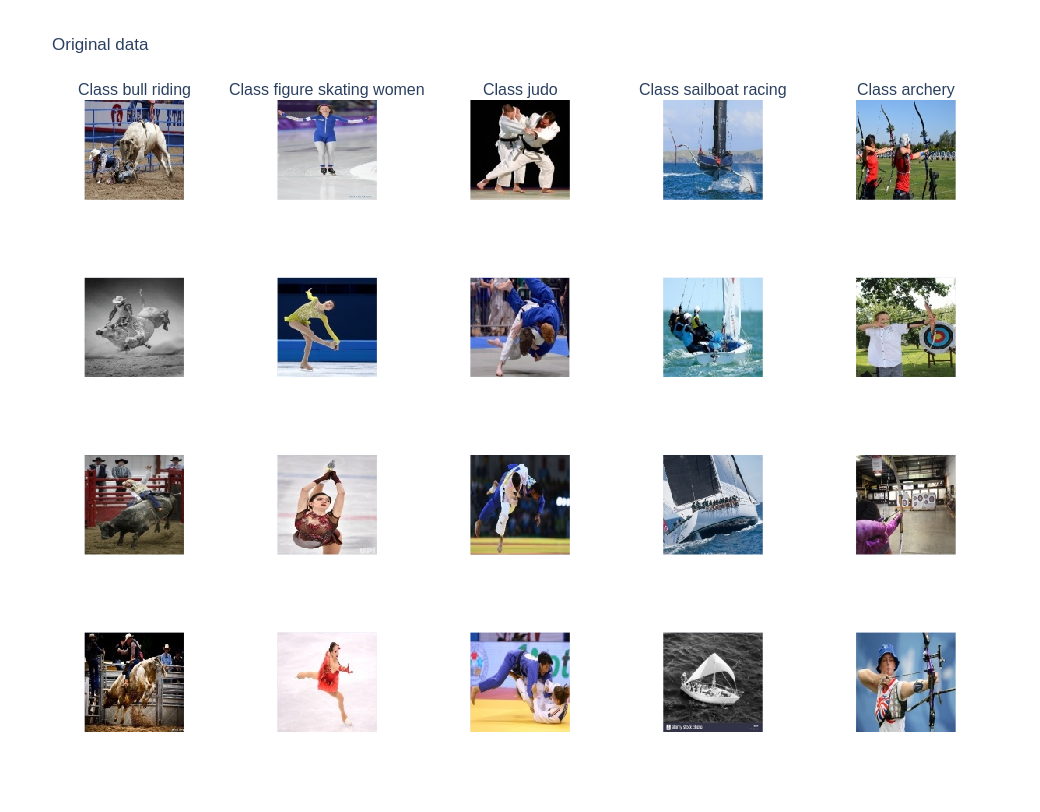

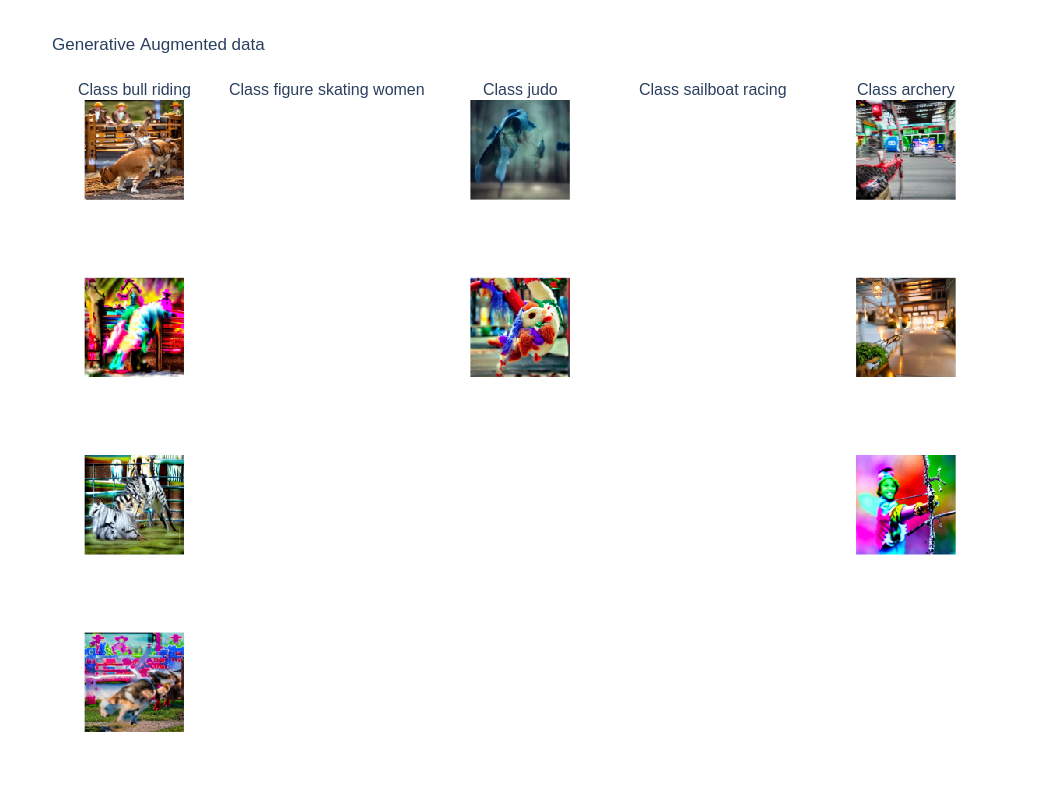

In [7]:
import cdmetadl.augmentation
import cdmetadl.notebooks.helpers

generative_augmentor = cdmetadl.augmentation.GenerativeAugmentation(threshold=0.75, scale=1.0, keep_original_data=False, annotator_type="hed")
create_plot(generative_augmentor, task, conf_scores=[0.0, 1.0, 0.5, 0.75, 0.3])